In [1]:
# for simplicity instead of the similarity func1tion over mercury and pxrd pattern i do 
# similarity over pxrd pattern from file NaCl.cif and another pattern from POSCAR-NaCl
# plot is below.

import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit
from XRD import Element, crystal, XRD

"""
Structure 1
"""
_struct = crystal('cif',filename='NaCl.cif')
_wavelength = 1.54056
_max_diff_angle = 90
_profile = 'gaussian'
_fwhm = 0.2
_po = True
_G = 0.9

xrd1 = XRD(_struct,_wavelength,_max_diff_angle,_profile,_fwhm,_po,_G)
simpeaks1 = xrd1.pxrd[:][:,-1]
simtwo_thetas1 = xrd1.pxrd[:,0]
gpeaks1 = xrd1.gpeaks
gtwo_thetas1 = xrd1.gtwo_thetas
gintegral1 = xrd1.gintegral

"""
Structure 2
"""

# _struct = crystal('POSCAR',filename='POSCAR-NaCl')
_struct = crystal('cif',filename='NaCl.cif')
_wavelength = 1.54056
_max_diff_angle = 90
_profile = 'gaussian'
_fwhm = 0.2
_po = True
_G = 0.9

xrd2 = XRD(_struct,_wavelength,_max_diff_angle,_profile,_fwhm,_po,_G)
simpeaks2 = xrd2.pxrd[:][:,-1]
simtwo_thetas2 = xrd2.pxrd[:,0]
gpeaks2 = xrd2.gpeaks
gtwo_thetas2 = xrd2.gtwo_thetas

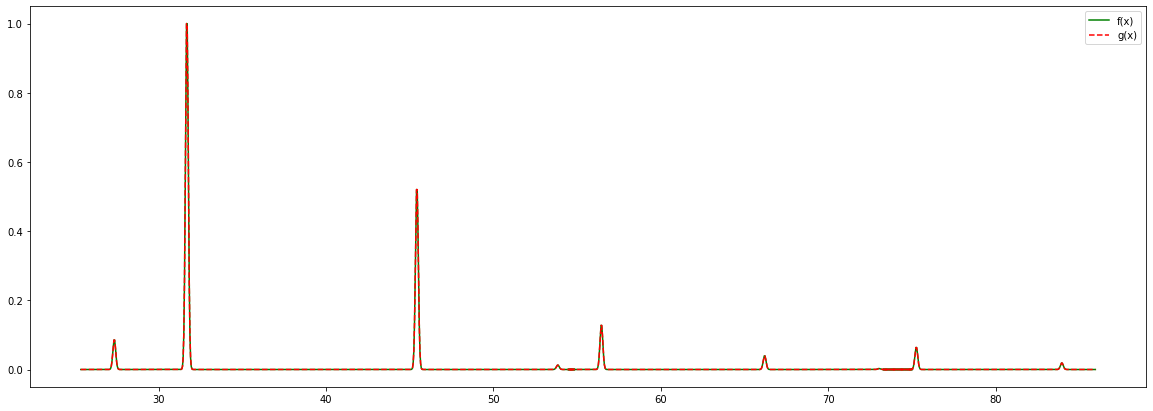

In [2]:
plt.figure(figsize=(20,7))
plt.plot(gtwo_thetas1,gpeaks1, 'g-',label = 'f(x)')
plt.plot(gtwo_thetas2,gpeaks2, 'r--',label = 'g(x)')
plt.legend()
plt.show()

In [3]:
import scipy.integrate as integrate    

def xcorIntegral(If,Ig,fwhm,x,xf,xg,r,l):
    
    """
    This func1tion calculated the cross-correlation integral between pattern 1 and pattern 2
    """
    
    c = -4*np.log(2)/fwhm**2

    tmp1 = 0
    tmp2 = 0
    
    for ri, xi, in zip(r,x):
        if np.abs(ri) < l:
            term1 = lambda xi, ri, xf,xg,c,l : (1 - np.abs(ri)/l) * np.exp(c*((xi-xf)**2 + (xi+ri-xg)**2))
            tmp1 += integrate.dblquad(term1, r[-1],r[0],x[-1],x[0] ,args = (xf,xg,c,l))[0]
        else:
            tmp1 += 0
        
    return np.abs(If*Ig*tmp1)
    
def acorIntegral(I,fwhm,x,xf,r,l):
    
    c = -4*np.log(2)/fwhm**2

    tmp1 = 0
    tmp2 = 0
    
    for ri, xi, in zip(r,x):
        if np.abs(ri) < l:
            term1 = lambda xi, ri, xf, c, l: (1 - np.abs(ri)/l) * np.exp(c*((xi-xf)**2 + (xi+ri-xf)**2))
            tmp1 += integrate.dblquad(term1, r[-1],r[0],x[-1],x[0], args = (xf,c,l))[0]
        else:
            tmp1 += 0

    return np.abs(I**2*tmp1)

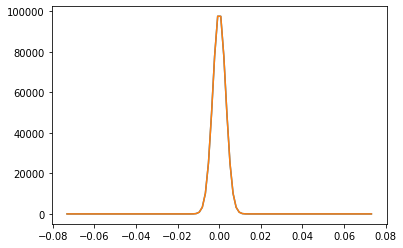

In [4]:
# load the stored individual peaks from patterns 1 and 2
"""
pattern 1 info
"""
ind_peaks1 = xrd1.ind_peaks
ind_thetas1 = xrd1.ind_thetas

"""
pattern 2 info
"""
ind_peaks2 = xrd2.ind_peaks
ind_thetas2 = xrd2.ind_thetas

"""
peak1_num decides which peak from the first pattern to choose
peak2_num decides whick peak from the second pattern to choose
"""

# peak1 pattern1
peak1_num = 0
shift = ind_thetas1[peak1_num] - (ind_thetas1[peak1_num]/np.mean(ind_thetas1[peak1_num]) - 1 )
ind_thetas1[peak1_num] = ind_thetas1[peak1_num]/np.mean(ind_thetas1[peak1_num]) - 1 
ef = np.where(ind_peaks1[peak1_num] == np.max(ind_peaks1[peak1_num]))[0][0]
Iof = ind_peaks1[peak1_num][ef] # max intensity
xof = ind_thetas1[peak1_num][ef] # 2theta
x_f = ind_thetas1[peak1_num]

# peak2 pattern2
peak2_num = 0
ind_thetas2[peak2_num] = ind_thetas2[peak2_num]-shift
eg = np.where(ind_peaks2[peak2_num] == np.max(ind_peaks2[peak2_num]))[0][0]
Iog = ind_peaks2[peak2_num][eg] # max intensity
xog = ind_thetas2[peak2_num][eg] # 2theta
x_g = ind_thetas2[peak2_num]


x_fg = np.concatenate((ind_thetas1[peak1_num],ind_thetas2[peak2_num]))
x_fg = np.sort(x_fg)
x_fg = np.linspace(x_fg[0],x_fg[-1],100) # range of 2theta values for comparing peaks
r_fg = np.linspace(-1,1,100) # r value between each peak


plt.plot(ind_thetas1[peak1_num],ind_peaks1[peak1_num])
plt.plot(ind_thetas2[peak2_num],ind_peaks2[peak2_num])
plt.show()

In [5]:
a = xcorIntegral(Iof,Iog,0.2,x_fg,xof,xog,r_fg,0.6)
b = acorIntegral(Iof, 0.2, x_f, xof, r_fg,0.6)
c = acorIntegral(Iog, 0.2, x_g, xog, r_fg,0.6)
S = a/(np.sqrt(c*b))
print(S)

1.0000000000000073
